In [108]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import cv2
from sklearn.manifold import TSNE
import torch
import io
from sklearn.cluster import AgglomerativeClustering
from PIL import Image
import pandas as pd
import seaborn as sns
import matplotlib as mpl

import matplotlib.colors as mcolors

from scipy.stats import norm
from matplotlib import cm



In [5]:
path = r"/Users/amarklein/Downloads/initals" # path to images
os.chdir(path)
fileending = ".jpg"

## Load trained model

In [ ]:
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)
with open("imgs_initials_trained_model", 'rb') as f:
    contents = CPU_Unpickler(f).load()

In [520]:
model, acc_epoch, acc_train, acc_val = contents

In [6]:
images = [] # read in images for having the bids in the right order as in the output pickle file

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith(fileending):
            images.append(file.name)
            
len(images)

6213

In [60]:
with open("/Users/amarklein/Initials_BA/initials/Reps/VGG16_Initials_Gram-14default_wlowtriag.pickle", 'rb') as f: 
    var=pickle.load(f)
var.shape

torch.Size([5862, 131328])

In [13]:
pca_v = True
components_pca = 2
nb_clusters = 20

In [18]:
tsne= TSNE(n_components=components_pca, random_state=22)
piece = tsne.fit_transform(var)


KeyboardInterrupt: 

In [55]:
# load saved 2d reps: 
with open("/Users/amarklein/Initials_BA/initials/Reps/2dreps-14default_gram_norm.pickle", 'rb') as f: 
    piece=pickle.load(f)


In [56]:
with open("/Users/amarklein/Initials_BA/initials/data/images_list.pickle", 'rb') as f: 
    images_list=pickle.load(f)

In [57]:
# load all books data

booksdf = pd.read_json('/Users/amarklein/Initials_BA/initials/data/all_books.json')


In [58]:
# extract needed data
images_list = [i.replace('-', '_') for i in images_list]
bookid_list = [int(i.split("_")[0]) for i in images_list]
df_data = pd.DataFrame({'x':piece[:,0], 'y':piece[:,1], 'id': bookid_list}) 
printer_list = [booksdf.loc[booksdf['bid']==i]['printers'].iloc[0] for i in df_data['id']] # other possibilities?
booklist_cleaned = [i.replace('-','_') for i in images_list]
year_list = [(i.split("_")[-2]) for i in booklist_cleaned]
year_list_int = []
for i in booklist_cleaned:
    try: app = int(i.split("_")[-2])
    except: app = int(i.split("_")[-3])
    year_list_int.append(app)

year_list= year_list_int

place_list = [booksdf.loc[booksdf['bid']==i]['place'].iloc[0] for i in df_data['id']]
df_data['printer']= printer_list
df_data['year'] = year_list
df_data['place'] = place_list

## Cluster by Books

[0.9985444  0.12663755 0.36098981 ... 0.26637555 0.52256186 0.97671033]


/var/folders/s7/g4m4_9855cxb0jsk5ct6k7980000gp/T/ipykernel_8049/1828124376.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('rainbow', 300)


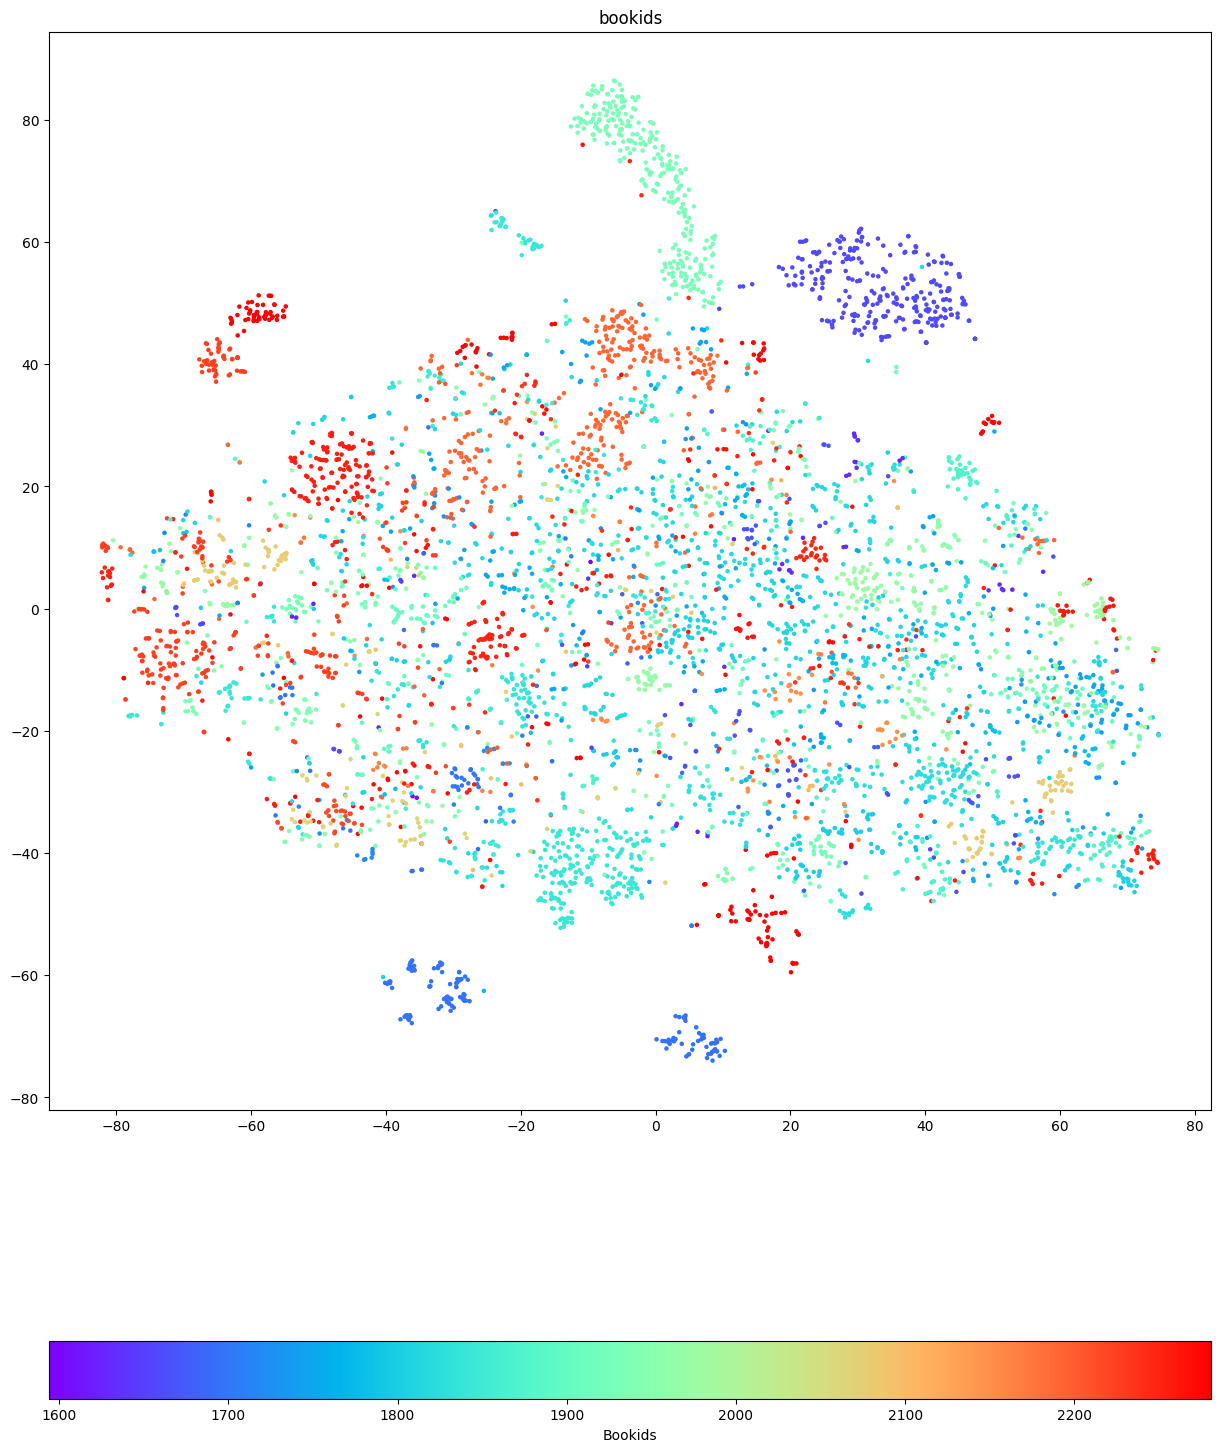

In [65]:
title = "bookids" # change title...
cmap = plt.cm.get_cmap('rainbow', 300)
fig = plt.figure(figsize= (15,20))
ax = fig.add_subplot()#projection='3d')
print(norm(bookid_list))
sc = plt.scatter(piece[:,0], piece[:,1], c=bookid_list, cmap = cmap, s=5)
#ax.view_init(45)
plt.title(title)


norm = mpl.colors.Normalize(vmin=min(bookid_list), vmax=max(bookid_list))

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='horizontal', label='Bookids')


In [66]:
import random
d = mcolors.XKCD_COLORS
l = list(d.items())
random.shuffle(l)
d_shuffled = dict(l)
colors = list(d_shuffled.values())[0:len(set(bookid_list))] 
res = {list(set(bookid_list))[i]: colors[i] for i in range(len(set(bookid_list)))}
df_data = pd.DataFrame({'x':piece[:,0], 'y':piece[:,1], 'id': bookid_list})

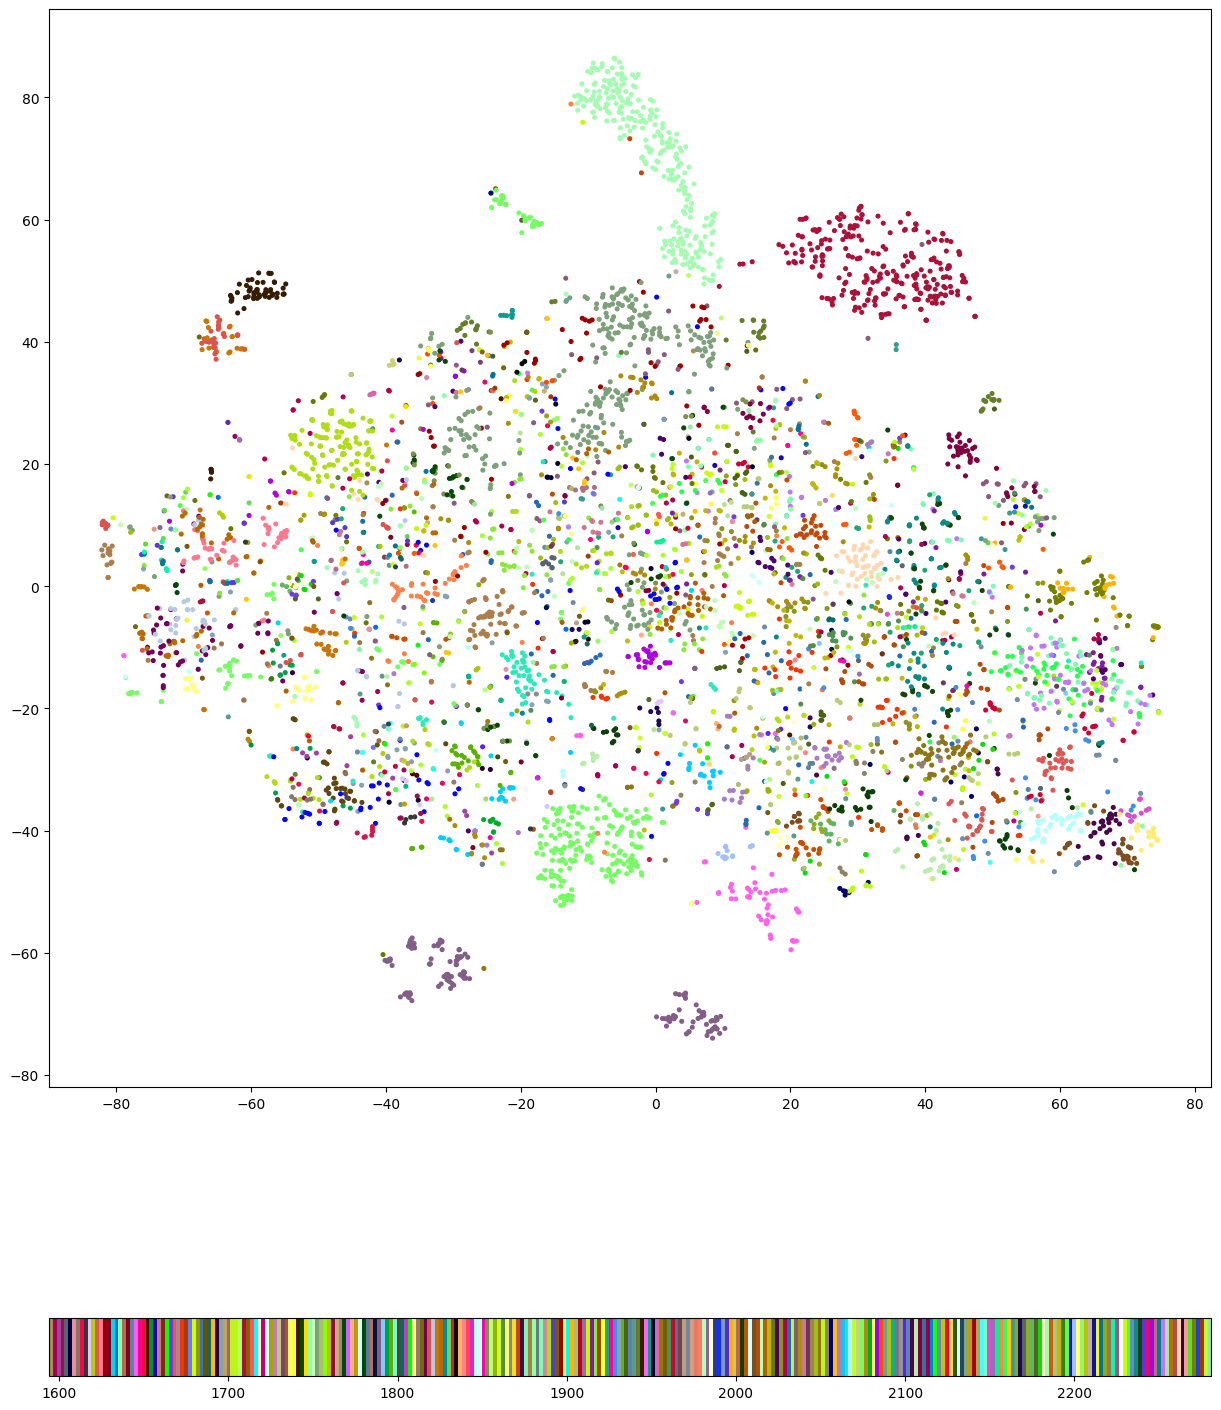

In [67]:
# Erstellen Sie eine ColorMap aus Ihren Farben
cmap = mcolors.ListedColormap(colors)




# Erstellen Sie eine Colorbar von der ColorMap

fig = plt.figure(figsize= (15,20))
ax = fig.add_subplot(111)
#ax.set_position([bottom])
plt.scatter(df_data['x'], df_data['y'], 
            c= df_data['id'].map(res), s = 7)

bounds = range(len(colors) + 1)
norm = mpl.colors.Normalize(vmin=min(bookid_list), vmax=max(bookid_list))
cb = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation = 'horizontal')




## Cluster by Printer

/var/folders/s7/g4m4_9855cxb0jsk5ct6k7980000gp/T/ipykernel_8049/2972439616.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("Set3").colors
/var/folders/s7/g4m4_9855cxb0jsk5ct6k7980000gp/T/ipykernel_8049/2972439616.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(d['x'], d['y'], label=k, c=colors[idx])  # many more indices needed...


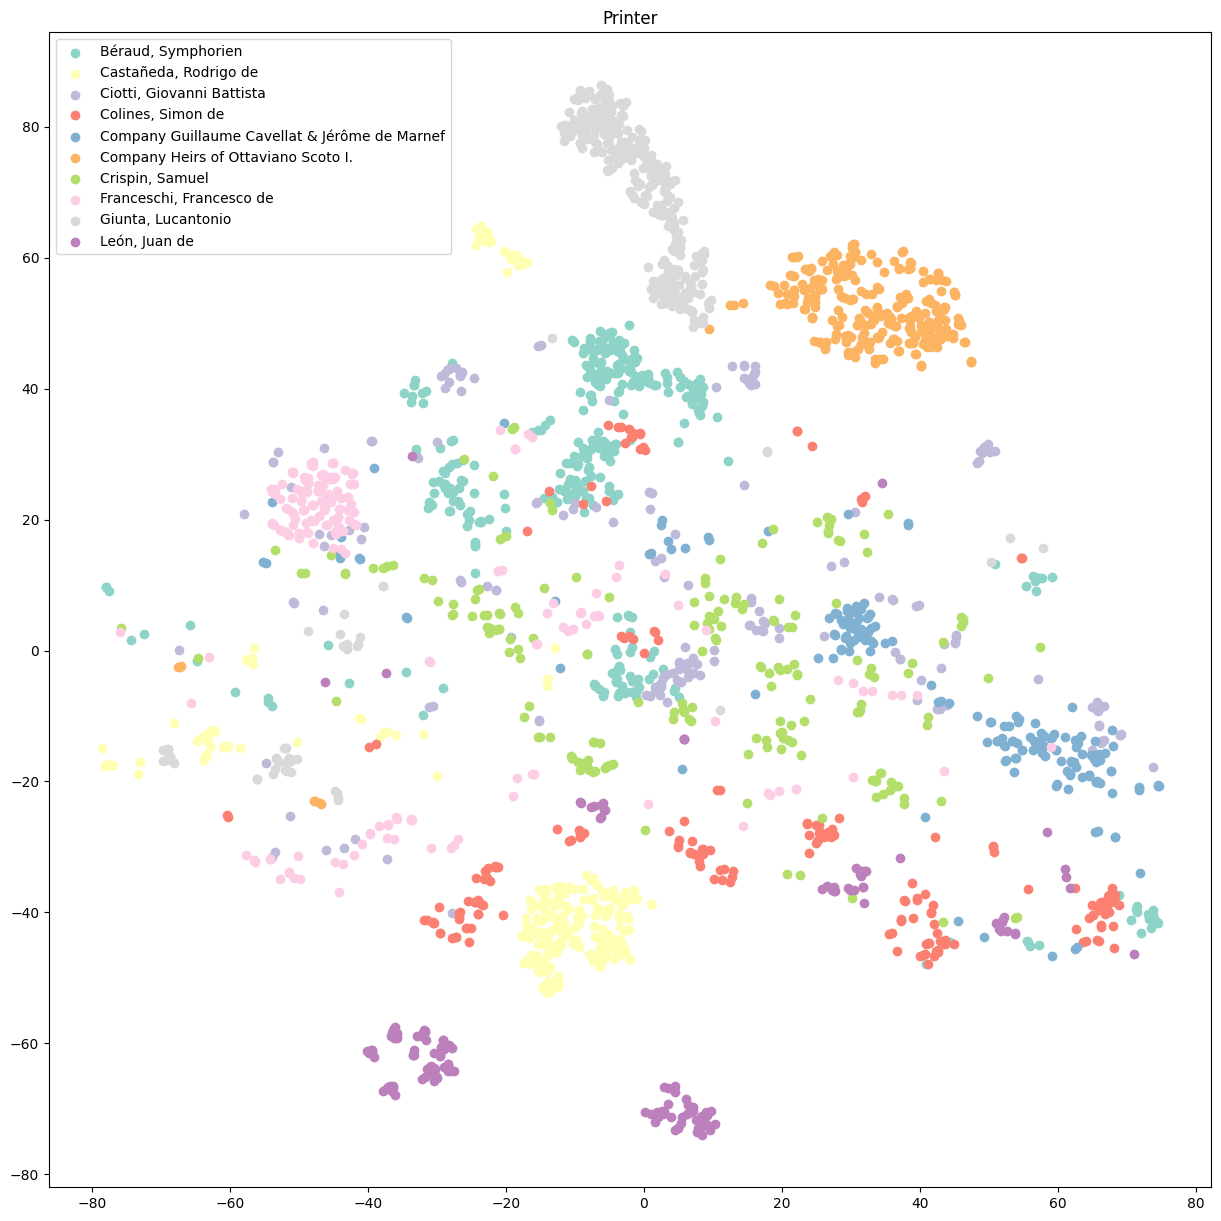

In [121]:
colors = cm.get_cmap("Set3").colors

#d = mcolors.XKCD_COLORS
#l = list(d.items())

#random.shuffle(l)
#d_shuffled = dict(l)

#title = "Printer"

#colors = list(d_shuffled.values())[0:len(set(printer_list))+1] 

#colors = [l[i][1] for i in range(0, len(l), int(len(l)/len(set(printer_list))))]
#print(colors)

printer_set = set(printer_list)
ocur = []
for p in printer_set:
    ocur.append(printer_list.count(p))

ocur.sort()

thresh = ocur[-10]

df_data = pd.DataFrame({'x':piece[:,0], 'y':piece[:,1], 'printer': printer_list})

fig = plt.figure(figsize= (15,15))
ax = fig.add_subplot()
idx = 0
for k,d in df_data.groupby('printer'):
    if printer_list.count(k) >= thresh:
        ax.scatter(d['x'], d['y'], label=k, c=colors[idx])  # many more indices needed...
        idx += 1
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend()
plt.title(title)
plt.show()


## Cluster by Year

/var/folders/s7/g4m4_9855cxb0jsk5ct6k7980000gp/T/ipykernel_8049/3609099809.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('rainbow', len(set(year_list)))


Text(0.5, 1.0, 'Year')

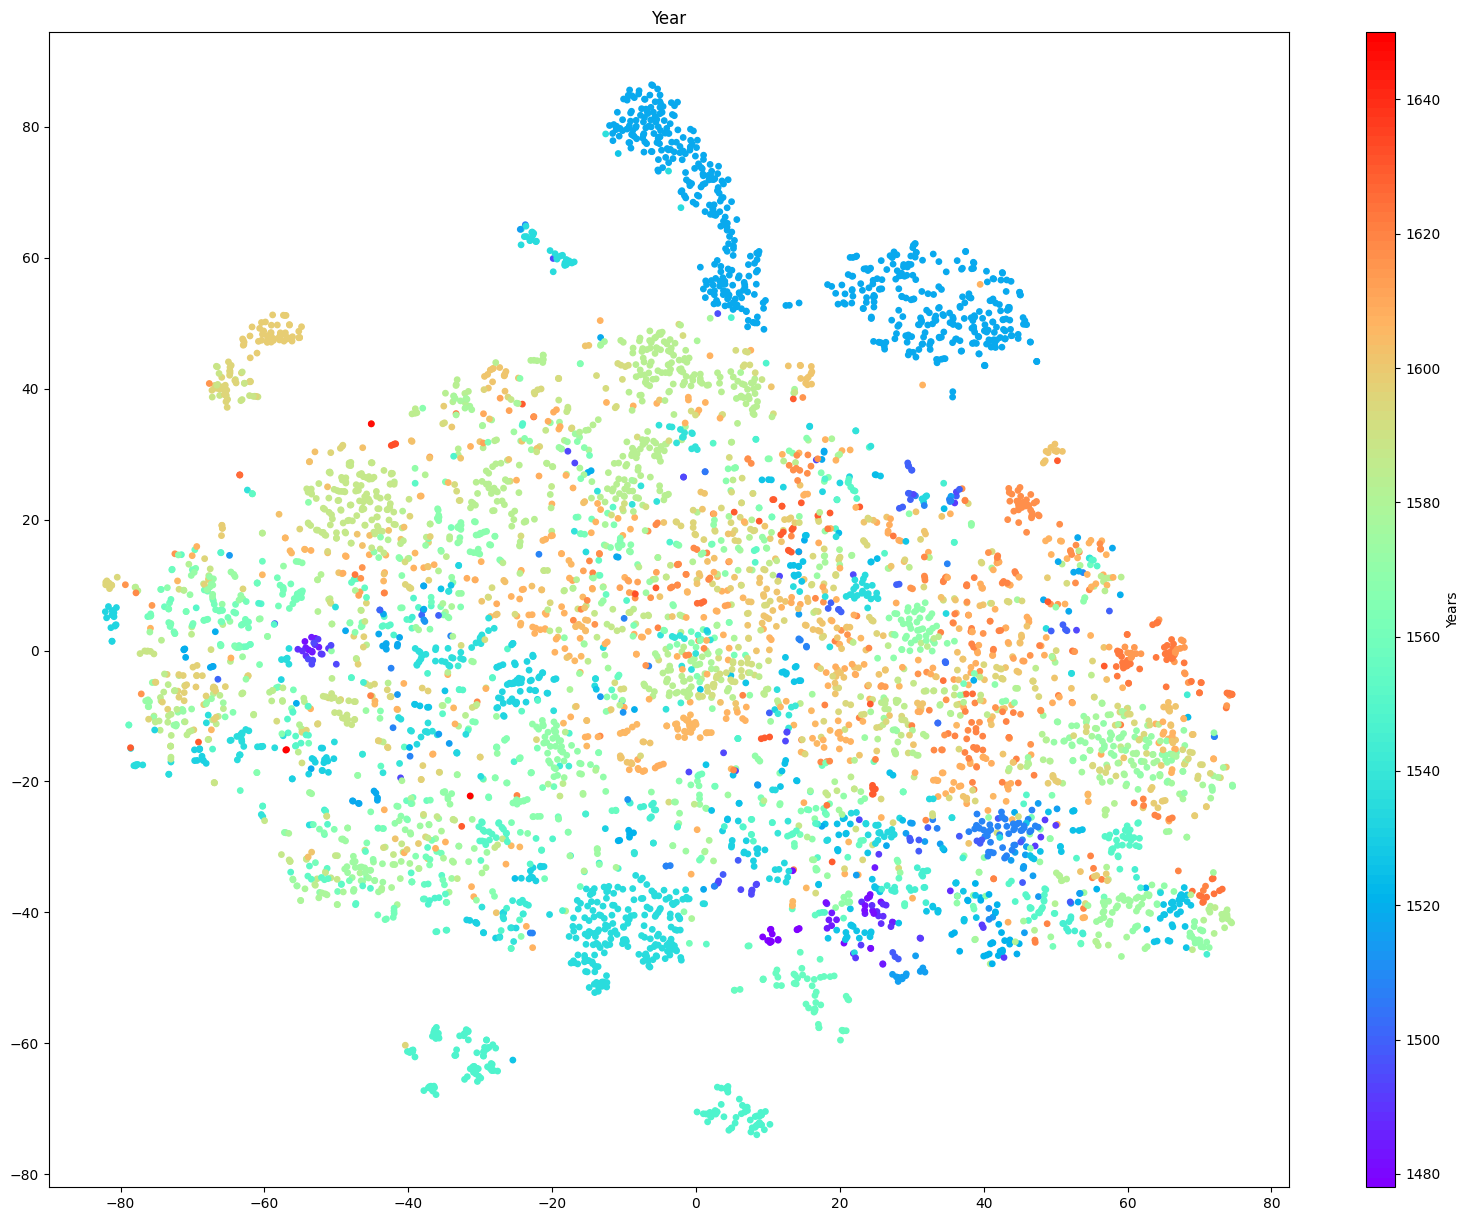

In [132]:
title = "Year"
cmap = plt.cm.get_cmap('rainbow', len(set(year_list)))
norm = mpl.colors.Normalize(vmin=min(year_list), vmax=max(year_list))
fig = plt.figure(figsize= (20,15))
ax = fig.add_subplot()#projection='3d')
sc = plt.scatter(piece[:,0], piece[:,1], c=norm(year_list), cmap = cmap, s=15) 
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='vertical', label='Years', aspect=40)
plt.title(title)

## Cluster by Place

/var/folders/s7/g4m4_9855cxb0jsk5ct6k7980000gp/T/ipykernel_8049/2286837130.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("Set3").colors
/var/folders/s7/g4m4_9855cxb0jsk5ct6k7980000gp/T/ipykernel_8049/2286837130.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(d['x'], d['y'], label=k, c=colors[idx], s=15)  # many more indices needed...


40


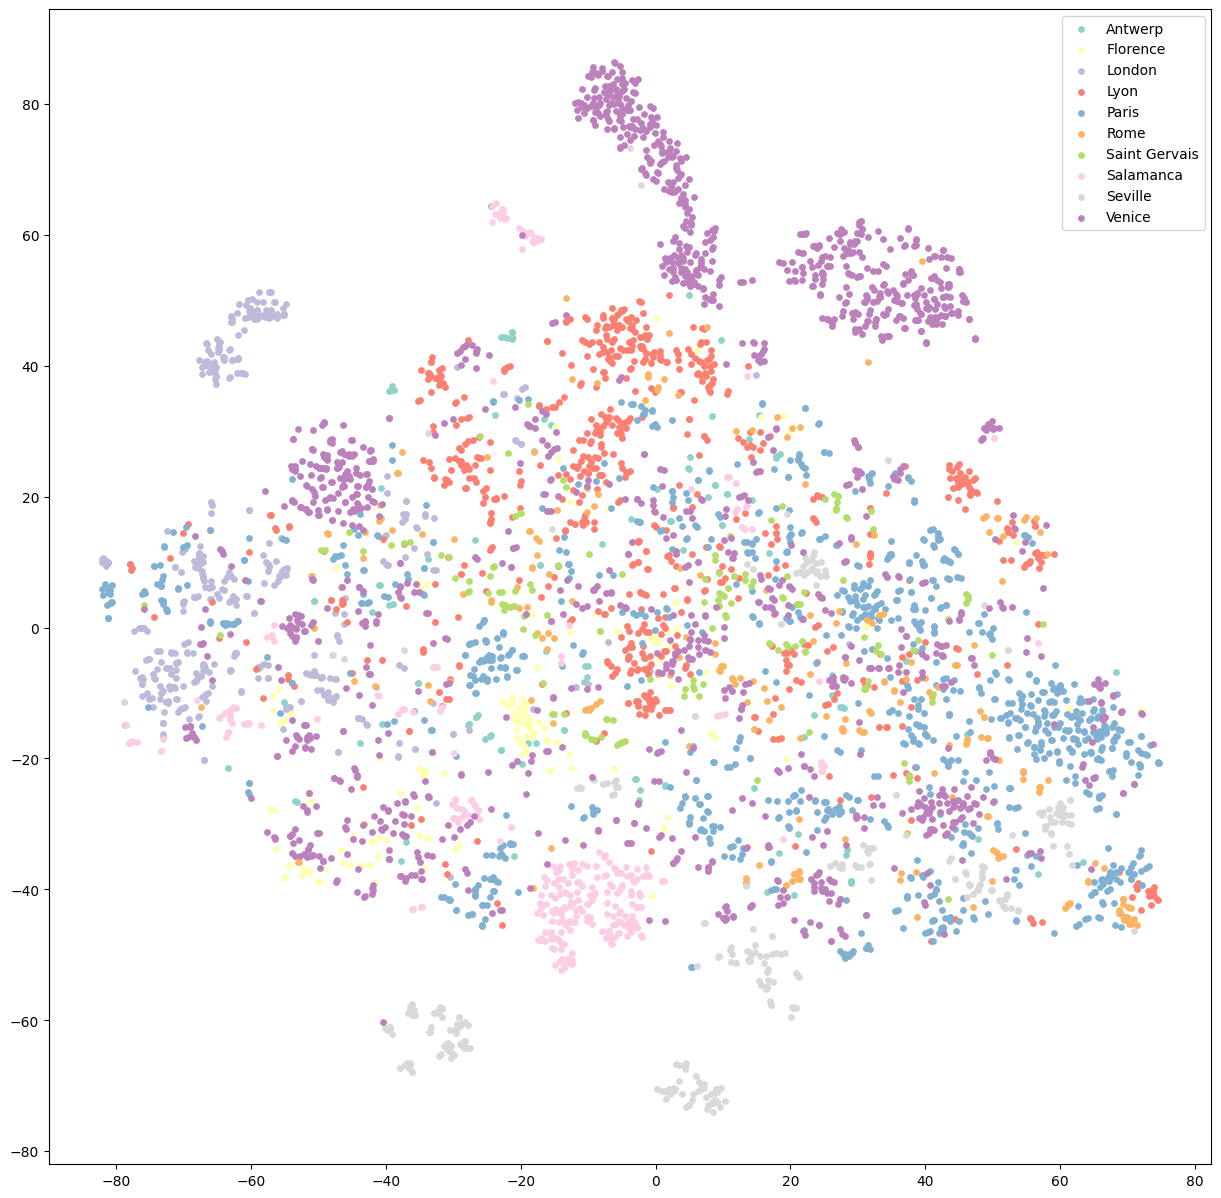

In [133]:
colors = cm.get_cmap("Set3").colors

#l = list(d.items())
#random.shuffle(l)
#d_shuffled = dict(l)

place_set = set(place_list)
print(len(place_set))
ocur = []
for city in place_set:
    ocur.append(place_list.count(city))

ocur.sort()

thresh = ocur[-10]


#colors = list(d_shuffled.values())[0:len(set(place_list))] 
#colors = [l[i][1] for i in range(0, len(l), int(len(l)/len(set(place_list)))+1)]


df_data = pd.DataFrame({'x':piece[:,0], 'y':piece[:,1], 'place': place_list})

fig = plt.figure(figsize= (15,15))
ax = fig.add_subplot()
idx = 0
for k,d in df_data.groupby('place'):
    if place_list.count(k) >= thresh: 

        ax.scatter(d['x'], d['y'], label=k, c=colors[idx], s=15)  # many more indices needed...
        idx += 1
plt.legend()

plt.show()

In [105]:
# overtime plot? - sieht man da irgendwas? 3-5 Timewindows 





120

## Trained Resnet model - without dense Layers




In [598]:
with open("/Users/amarklein/Downloads/initials_new" + "/class_images_data.pickle", "rb") as f:
    images=pickle.load(f)

In [599]:
classes = ['INIT_Letter_Z', 'INIT_Letter_T', 'INIT_Letter_G', 'INIT_Letter_L', 'INIT_Letter_R', 'INIT_Letter_A', 'INIT_Letter_I', 'INIT_Letter_V','INIT_Letter_Y','INIT_Letter_M','INIT_Letter_F','INIT_Letter_C','INIT_Letter_D','INIT_Letter_W','INIT_Letter_H','INIT_Letter_Q','INIT_Letter_N','INIT_Letter_K','INIT_Letter_E','INIT_Letter_P','INIT_Letter_B','INIT_Letter_O','INIT_Letter_S']

In [626]:
with open("/Users/amarklein/sphaera-initials-clustering/letter_dict_resnet.pickle", 'rb') as f: 
    letter_dict=pickle.load(f)

In [627]:
letter_dict

{'INIT_Letter_Z': tensor([[0.5177, 0.8850, 0.2245,  ..., 0.5289, 0.1863, 0.3052],
         [0.3043, 0.2487, 0.9942,  ..., 0.7420, 0.3296, 0.3557],
         [0.2841, 0.5491, 0.9068,  ..., 0.2330, 0.6050, 0.1844],
         ...,
         [0.0828, 0.4051, 0.3403,  ..., 0.1988, 0.3709, 0.6306],
         [0.3430, 0.2332, 0.3458,  ..., 0.6290, 0.6331, 0.6430],
         [0.0799, 0.2780, 0.3212,  ..., 0.2619, 0.3021, 0.7693]]),
 'INIT_Letter_T': tensor([[0.7096, 0.7623, 0.4991,  ..., 0.8535, 0.5502, 0.0582],
         [0.0498, 0.2764, 0.9305,  ..., 0.1777, 0.7993, 0.2457],
         [0.5221, 0.5937, 1.3426,  ..., 0.4492, 0.1678, 0.1765],
         ...,
         [0.5391, 0.2061, 0.3574,  ..., 0.3057, 0.4091, 0.1872],
         [0.1130, 0.2489, 0.1039,  ..., 0.2240, 0.4787, 0.4011],
         [0.2741, 0.0971, 0.3538,  ..., 0.5542, 0.9058, 0.2595]]),
 'INIT_Letter_G': tensor([[0.1451, 0.4828, 0.7991,  ..., 0.3223, 0.2670, 0.1293],
         [0.7888, 0.9418, 0.2143,  ..., 0.9161, 0.5903, 0.2542],
       

In [651]:
pca_v = True
components_pca = 2

tsne= TSNE(n_components=components_pca, random_state=22)

#fig = plt.figure(figsize= (15,15))
#ax = fig.add_subplot()

all_tensors = []
letters_len = []

for key, data_list in letter_dict.items():
    all_tensors.append(data_list)
    letters_len.append(len(data_list))
    
#all_reps = torch.cat(all_tensors)
piece = tsne.fit_transform(all_reps)

letter_list = [i*[c] for i, c in zip(letters_len, classes)]
letter_list = [item for sublist in letter_list for item in sublist]


df_letters = pd.DataFrame({'x':piece[:,0], 'y':piece[:,1], 'letter': letter_list})




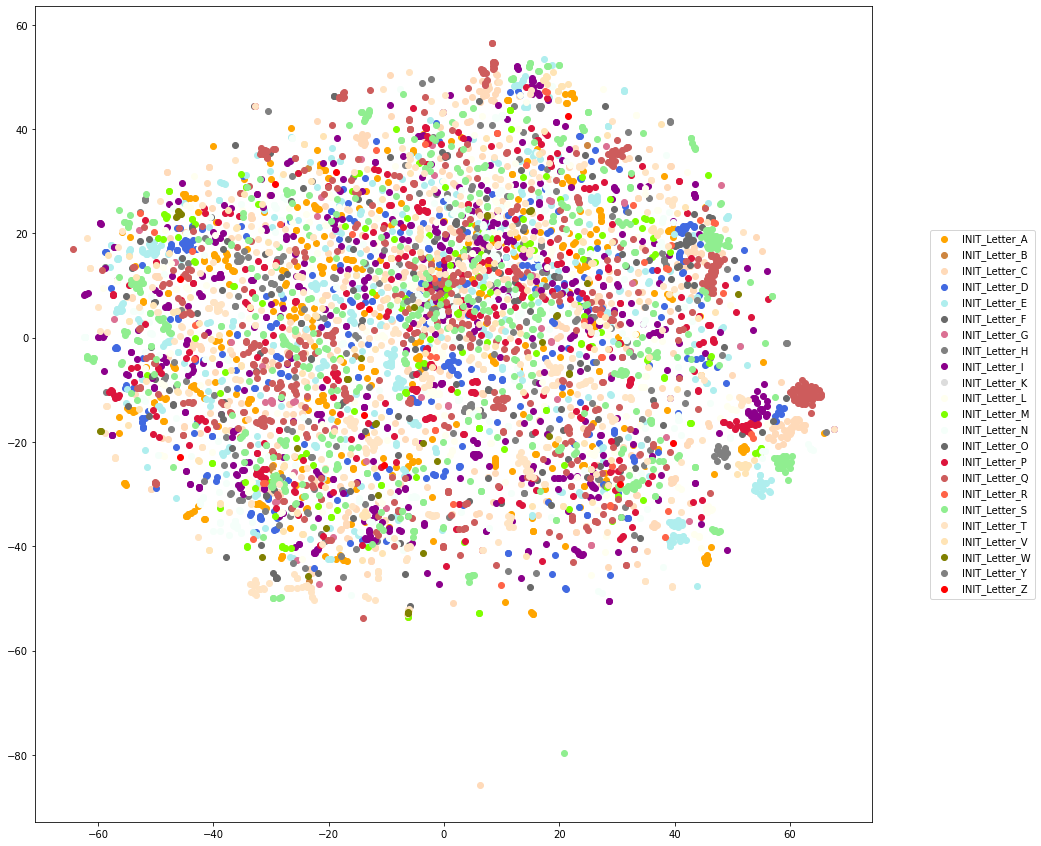

In [652]:
d = mcolors.CSS4_COLORS
l = list(d.items())
random.shuffle(l)
d_shuffled = dict(l)

colors = list(d_shuffled.values())[0:len(set(place_list))] 

fig = plt.figure(figsize= (15,15))
ax = fig.add_subplot()
idx = 0
for k,d in df_letters.groupby('letter'):
    ax.scatter(d['x'], d['y'], label=k, c=colors[idx])  # many more indices needed...
    idx += 1
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))

plt.show()
